In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [8]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

In [4]:
class_names = dataset.class_names
class_names

['Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy']

In [5]:
len(dataset)

121

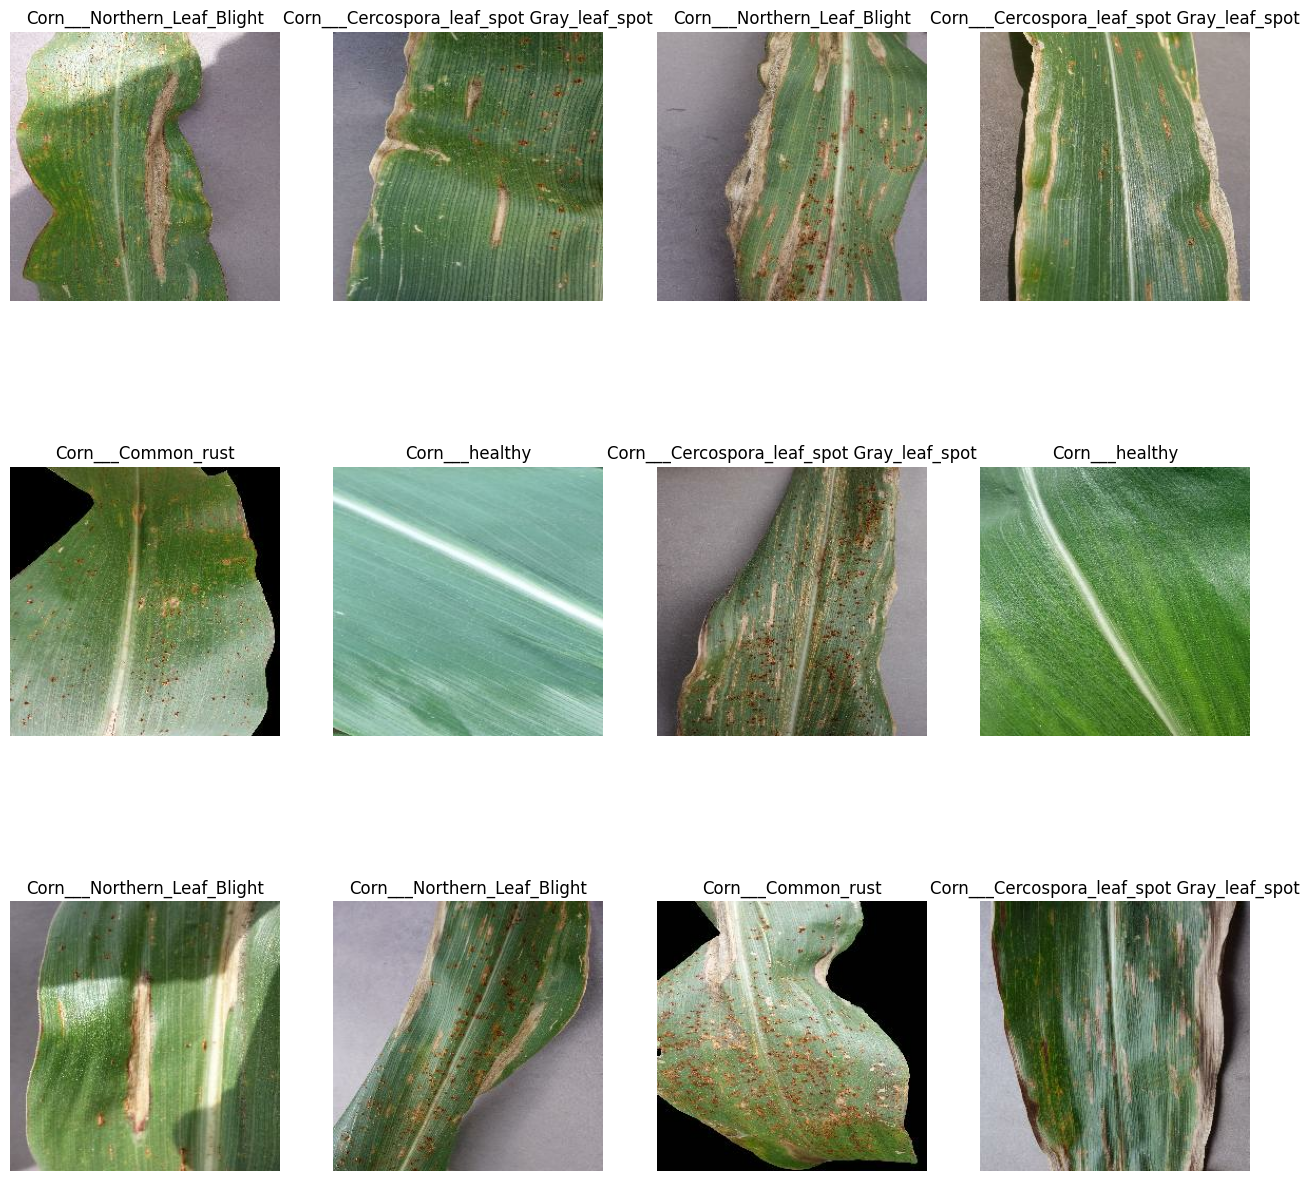

In [6]:
# Display the first 12 images and their labels from the dataset
plt.figure(figsize=(16,16))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
     ax= plt.subplot(3,4,i+1) 
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]])
     plt.axis("off")

In [7]:
# Get the total number of samples
len(dataset)

121

In [8]:
#80% ==> training
#20% ==> 10% validation, 10% test 

In [9]:
#train_size = 0.8
#len(dataset) * train_size

In [10]:
#train_ds = dataset.take(400)
#len(train_ds)

In [11]:
#test_ds = dataset.skip(400)
#len(test_ds)

In [12]:
#val_size = 0.1
#len(dataset) * val_size

In [13]:
#val_ds = test_ds.take(50)
#len(val_ds)

In [14]:
#test_ds = test_ds.skip(50)
#len(test_ds)

In [15]:
# Define a function that partitions a TensorFlow dataset into training, validation, and test sets
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len (ds)
    if shuffle:
        ds = ds.shuffle (shuffle_size, seed = 10)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

96

In [18]:
len(val_ds)

12

In [19]:
len(test_ds)

13

In [20]:
#optimizes TensorFlow datasets for machine learning by caching, shuffling, and prefetching elements
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
#applies two image preprocessing layers in sequence to input images.#
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
#applies two image data augmentation layers, random horizontal and vertical flipping and random rotation, in sequence to input images
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']

)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)


Epoch 1/30
96/96 [==============================] - 152s 2s/step - loss: 0.7583 - accuracy: 0.6624 - val_loss: 0.2732 - val_accuracy: 0.8681
Epoch 2/30
96/96 [==============================] - 178s 2s/step - loss: 0.2809 - accuracy: 0.8701 - val_loss: 0.2833 - val_accuracy: 0.8709
Epoch 3/30
96/96 [==============================] - 159s 2s/step - loss: 0.2753 - accuracy: 0.8838 - val_loss: 0.2041 - val_accuracy: 0.8984
Epoch 4/30
96/96 [==============================] - 148s 2s/step - loss: 0.2479 - accuracy: 0.8799 - val_loss: 0.1833 - val_accuracy: 0.9148
Epoch 5/30
96/96 [==============================] - 154s 2s/step - loss: 0.2318 - accuracy: 0.8971 - val_loss: 0.1877 - val_accuracy: 0.9341
Epoch 6/30
96/96 [==============================] - 150s 2s/step - loss: 0.2403 - accuracy: 0.9010 - val_loss: 0.2178 - val_accuracy: 0.9203
Epoch 7/30
96/96 [==============================] - 154s 2s/step - loss: 0.2195 - accuracy: 0.9014 - val_loss: 0.2087 - val_accuracy: 0.9176
Epoch 8/30
96

In [27]:
scores = model.evaluate(test_ds)

13/13 [==============================] - 6s 286ms/step - loss: 0.0809 - accuracy: 0.9688


In [28]:
scores

[0.08087719231843948, 0.96875]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 96}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
#extracts training and validation accuracy, as well as training and validation loss,
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

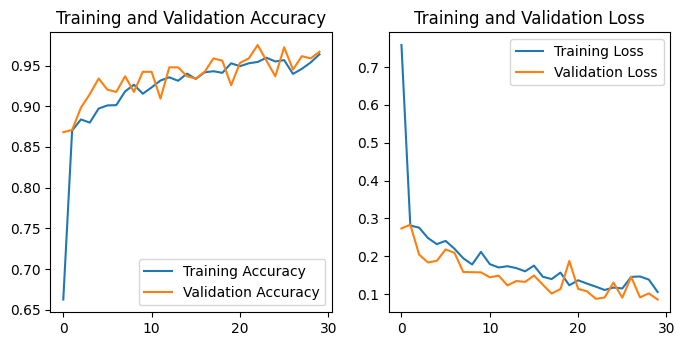

In [33]:
#plot the graph of training and validation accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
actual label:  Corn___Common_rust
1/1 [==============================] - 0s 236ms/step
predicted label:  Corn___Common_rust


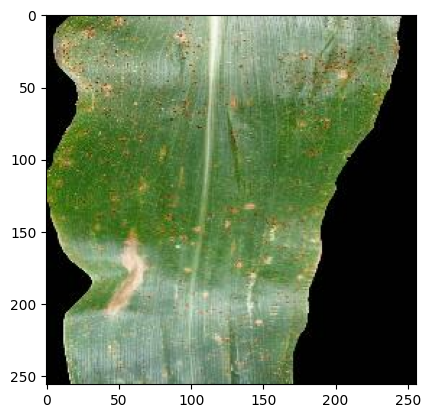

In [40]:
#Making Prediction
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


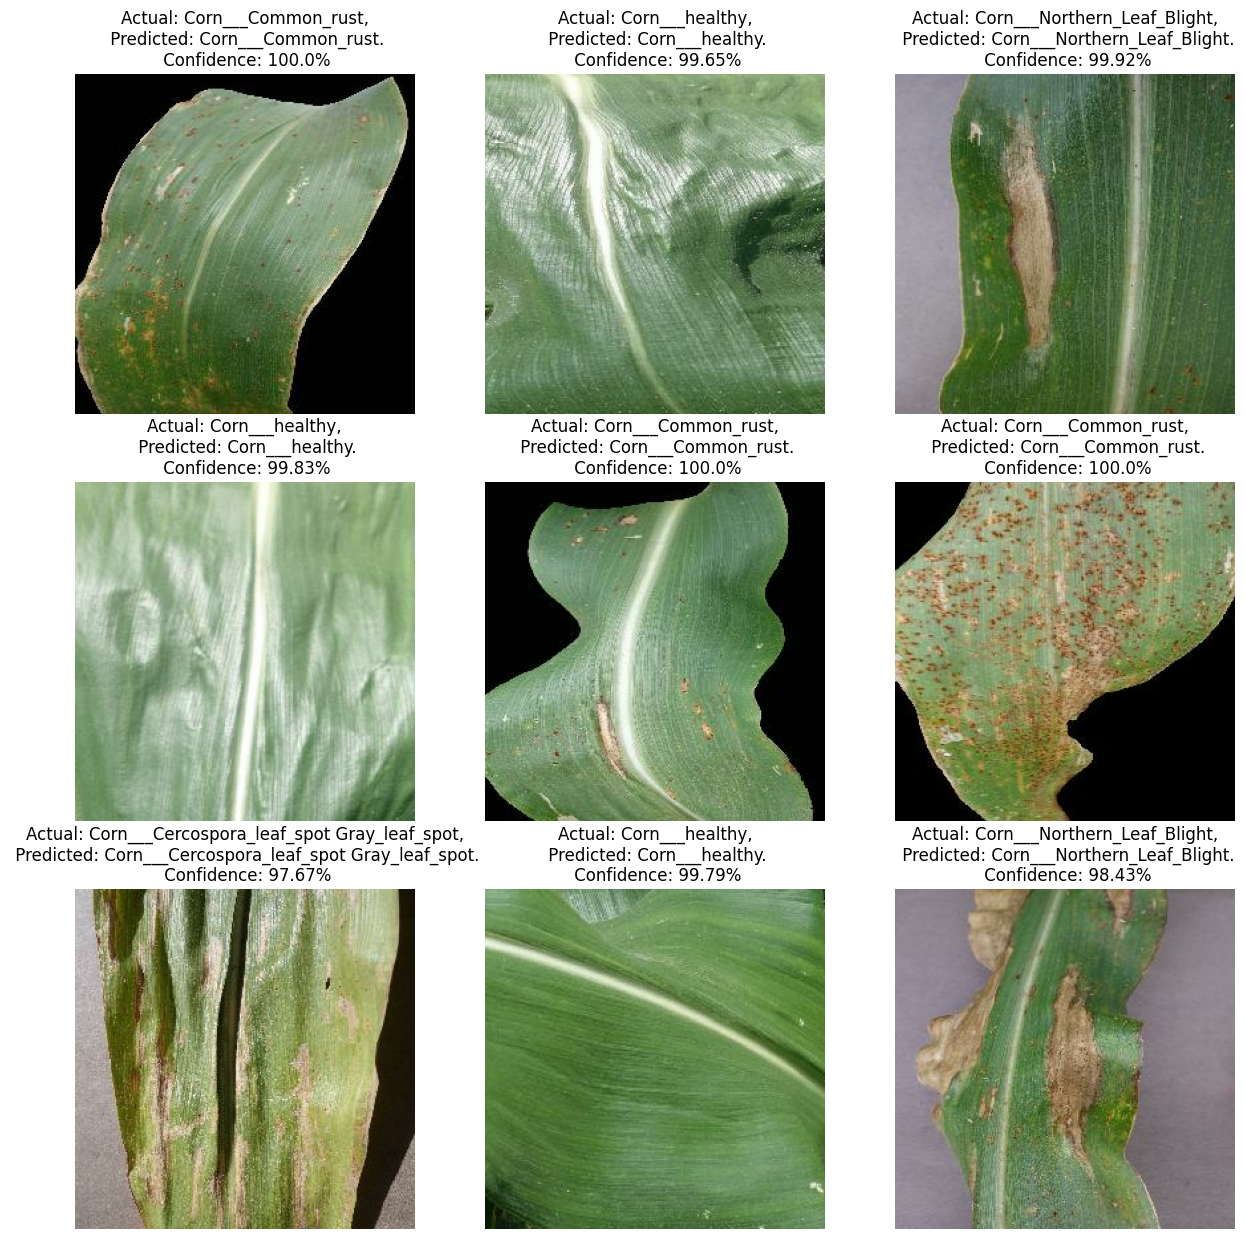

In [36]:
#Run the prediction and print the imgaes with their classes
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [37]:
import os
model_version = max([int(i) for i in os.listdir("../models")+ [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
